# Welcome to the Journey

****We're supposed to perform clustering for the given dataset in order to conclude customer segementation.****

# 

# 1. Importing necessary packages and modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 2. Importing our dataset

In [3]:
df = pd.read_csv(r"/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

# 3. EDA

In [4]:
data = df.copy()

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
df.columns = ['Gender', 'Age', 'Annual_income', 'Spending_score']

In [14]:
df.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
df['Gender'] = df['Gender'].map({"Male":1,"Female":2})

In [16]:
df.head()

,Gender,Age,Annual_income,Spending_score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


# 4. Gaining informations through Visualization

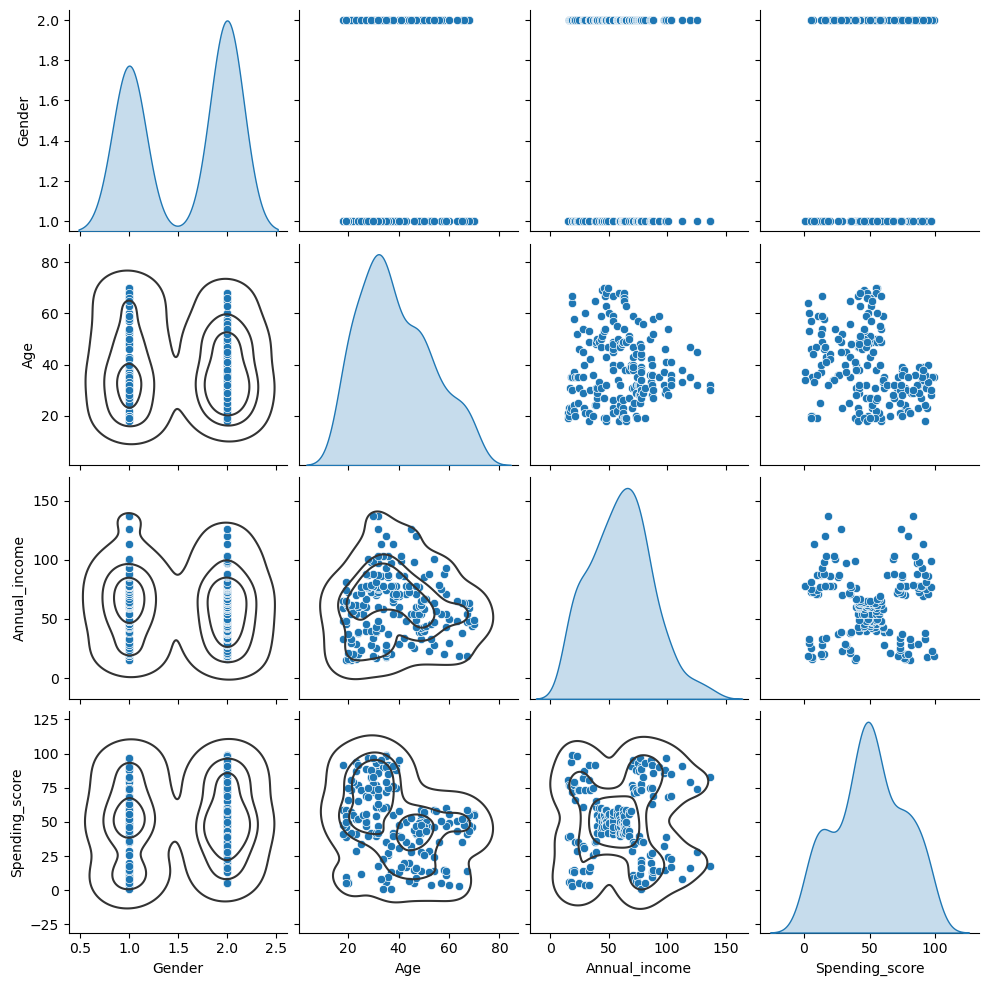

In [17]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

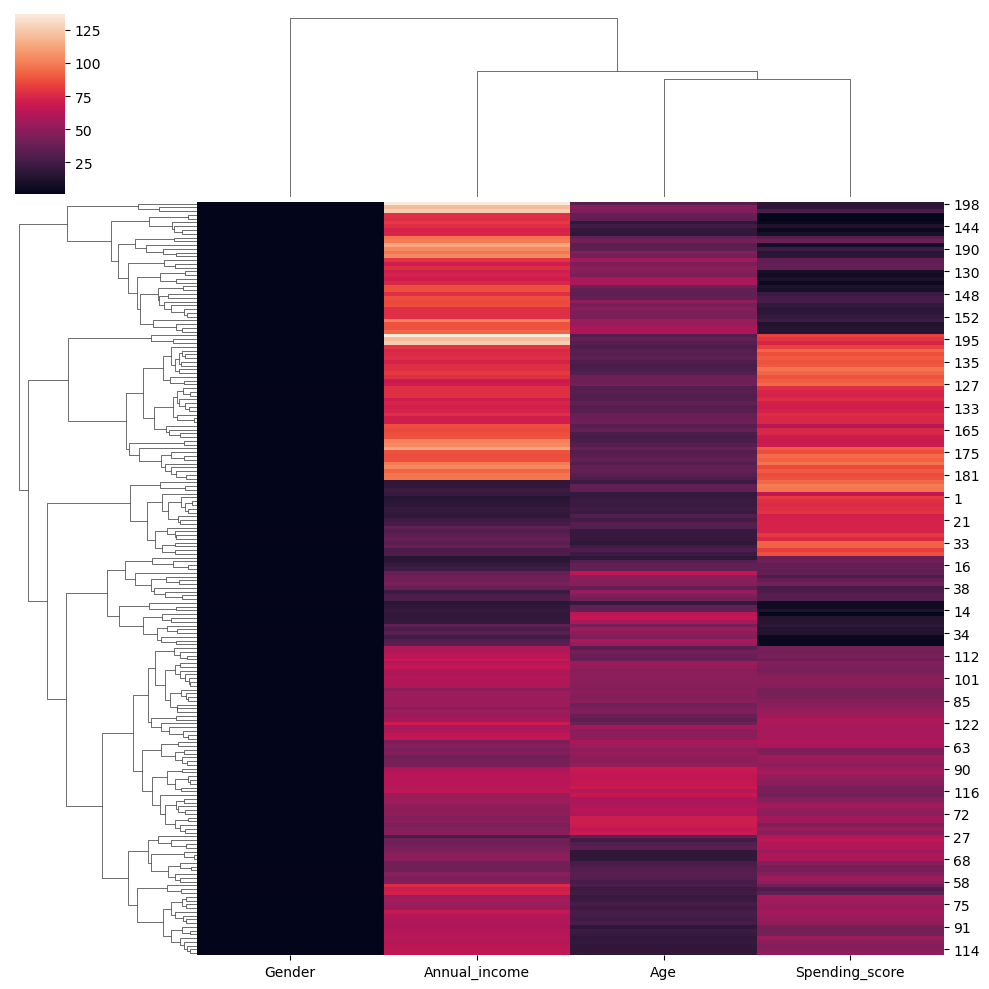

In [18]:
sns.clustermap(df)

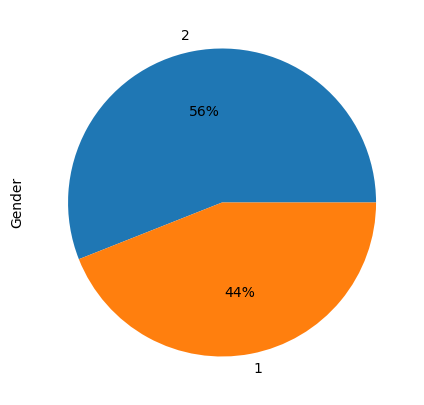

In [19]:
plt.figure(figsize=(5,5)) 
df['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

<Axes: >

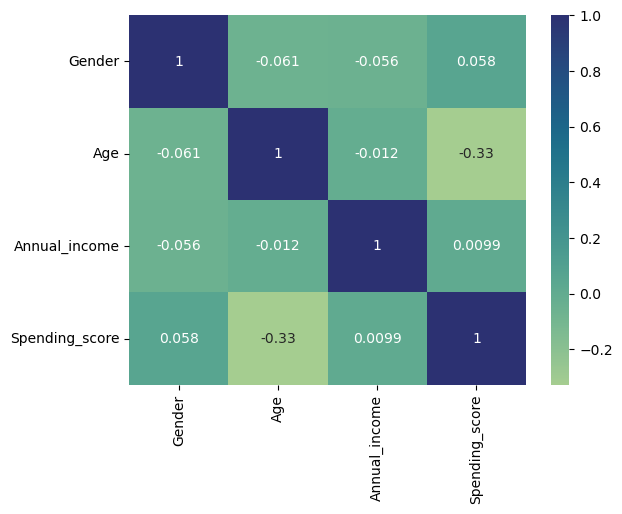

In [20]:
sns.heatmap(df.corr(), annot = True, cmap = "crest")

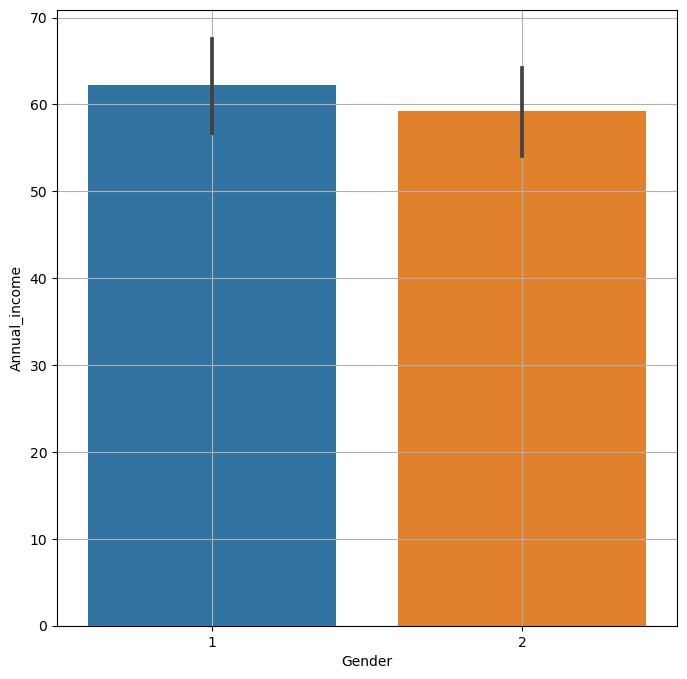

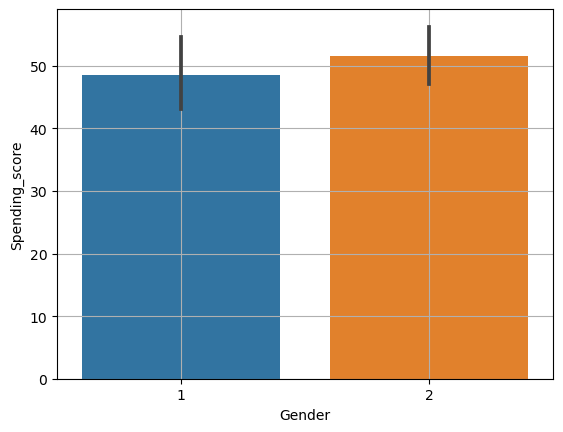

In [21]:
f = ['Annual_income', 'Spending_score']
plt.figure(figsize=(8,8))
for i in f:
    sns.barplot(x='Gender',y= i,data=df)
    plt.grid()
    plt.show()

# 5. Building Model using Kmeans Technique

In [22]:
wcss = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [23]:
wcss

[212889.442455243,
 143391.59236035676,
 104414.67534220166,
 75412.59682443162,
 58348.641363315044,
 51132.7032125769,
 44392.115665679354,
 40852.86916179338]

****Checking Elbow Function to decide the value of k****

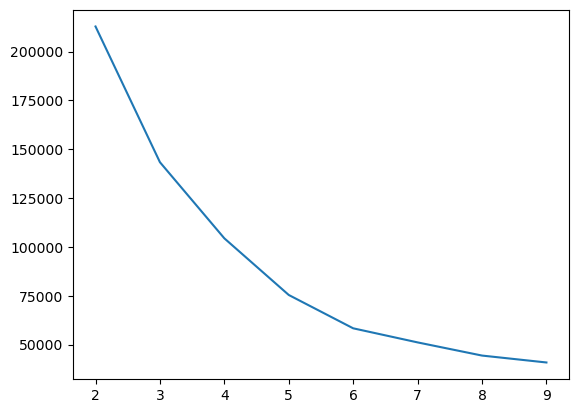

In [24]:
plt.plot(range(2,10), wcss)

In [25]:
km_new = KMeans(n_clusters=5)
pred = km_new.fit_predict(df)

In [26]:
pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

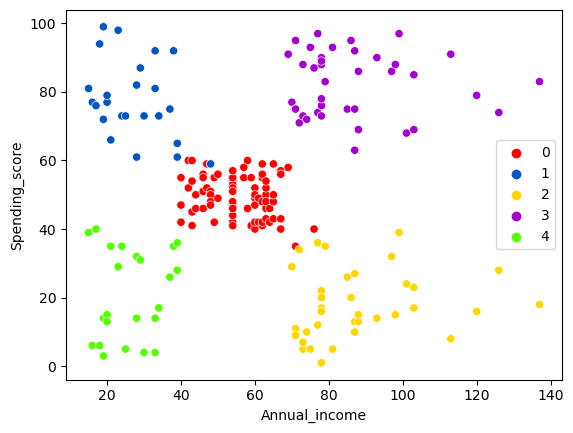

In [27]:
sns.scatterplot(x='Annual_income', y='Spending_score', hue= pred, data=df, palette='prism')
plt.show()

****Finally we can justify our model by clustering it into 5 aspects.****

# Thank you